# AI Student Community Challenge of the Month August

## 1. Problem Definition
> You have started a new company with your recently built AI-enabled solution, and like many other companies, you are looking at different ways of marketing your product so that everyone gets to know about it. Being an AI enthusiast yourself, you wish to use AI to decide which is the best way to get maximum returns from the major options available (TV, Newspaper, Radio, etc)

We need to use Linear Regression and any suitable dataset to predict the distribution of our marketing budget

## 2. Data

* The data is taken from [The Dummy Advertising and Sales data](https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data) dataset.

## 3. Evaluation
* Our aim is to create a model with an MAE <= 10

## 4. Features

The features of our data are:
 1. Total money
 2. Sales

The Labels of our data are:
 1. TV:- The amount spent on TV advertising
 2. Radio:- The amount spent on a radio advertising
 3. Social Media:- The amount spent on social media advertising

## Exploratory Data Analysis and Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [4]:
len(df)

4572

In [5]:
df.dropna(inplace=True)
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [6]:
len(df)

4546

In [7]:
data = df.drop("Influencer", axis=1)
data.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [8]:
data["Total"] = (data["TV"] + data["Radio"] + data["Social Media"])
data["Profit"] = (data["Sales"] - data["Total"]) / data["Total"] * 100
data["TV"] = data["TV"] / data["Total"] * 100
data["Radio"] = data["Radio"] / data["Total"] * 100
data["Social Media"] = data["Social Media"] / data["Total"] * 100

In [9]:
data

,TV,Radio,Social Media,Sales,Total,Profit
0,62.808612,25.775990,11.415398,54.732757,25.474214,114.855532
1,52.744046,37.479775,9.776179,46.677897,24.647332,89.383165
2,68.562038,26.566027,4.871935,150.177829,59.799856,151.134097
3,69.199922,25.028718,5.771360,298.246340,119.942332,148.658113
4,60.378195,33.962363,5.659442,56.594181,24.843406,127.803632
...,...,...,...,...,...,...
4567,83.361520,14.339336,2.299144,94.685866,31.189450,203.582989
4568,72.333645,20.997831,6.668523,249.101915,98.156259,153.780981
4569,63.864130,28.738964,7.396906,163.631457,68.896264,137.504107
4570,78.474271,19.380537,2.145192,253.610411,90.475514,180.308341


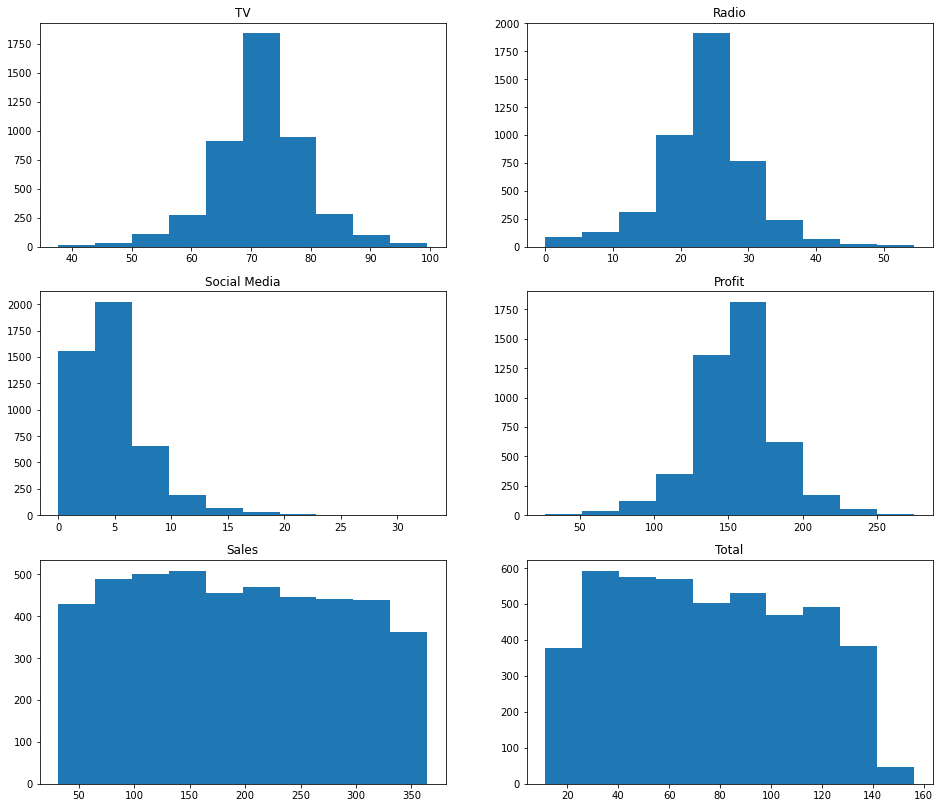

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))
ax[0, 0].hist(data["TV"])
ax[0, 0].set_title("TV")

ax[0, 1].hist(data["Radio"])
ax[0, 1].set_title("Radio")

ax[1, 0].hist(data["Social Media"])
ax[1, 0].set_title("Social Media")

ax[1, 1].hist(data["Profit"])
ax[1, 1].set_title("Profit")

ax[2, 0].hist(data["Sales"])
ax[2, 0].set_title("Sales")

ax[2, 1].hist(data["Total"])
ax[2, 1].set_title("Total");

In [11]:
X = data.drop(["TV", "Radio", "Social Media", "Sales"], axis=1)
y = data.drop(["Profit", "Total"], axis=1)
X.shape, y.shape

((4546, 2), (4546, 4))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3636, 2), (910, 2), (3636, 4), (910, 4))

## Modelling

In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
np.random.seed(42)

model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.747036308975622

## Model Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error as mae
y_preds = model.predict(X_test)
mae1 = mae(y_test, y_preds)
mae1

2.730202787121798

In [16]:
from sklearn.metrics import mean_squared_error as mse
y_preds = model.predict(X_test)
mse1 = mse(y_test, y_preds)
mse1

19.904285670223167

In [17]:
print(f"The percentages of distribution sums up to: {sum(y_preds[1, :3])} and the estimated sales is: {y_preds[1, 3]:.2f} million")

The percentages of distribution sums up to: 100.0 and the estimated sales is: 62.89 million


In [18]:
def check_percentages(y_preds=y_preds):
    a = 0
    for i in range(910):
        if round(sum(y_preds[i, :3]), 2) == 100.0:
                a += 1

    print(f"{a} out of {len(y_preds)} add up to 100%")

check_percentages()

910 out of 910 add up to 100%


In [19]:
def check_negatives(preds):
    a = 0
    for i in preds:
        for j in i:
            if j < 0:
                a += 1
    return a
check_negatives(y_preds)

0

In [20]:
total_value = data["Total"].mean()
profit_value = data["Profit"].mean()

preds1 = model.predict(np.array([[total_value, profit_value]]))
preds1

array([[ 71.59664705,  23.64651984,   4.75683311, 192.42010849]])

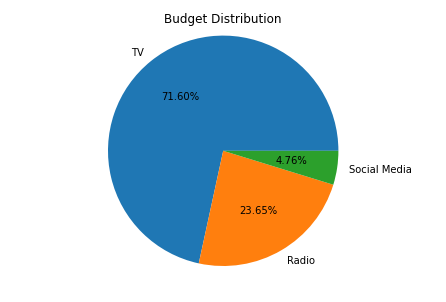

In [21]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
plt.suptitle("Budget Distribution")
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
media = ['TV', 'Radio', 'Social Media']
ax.pie(preds1[0, :3], labels=media, autopct='%1.2f%%')
plt.show();

## Saving the Model

In [22]:
from joblib import dump, load

# Save the model
dump(model, "./cotm_model.joblib")

['./cotm_model.joblib']